In [1]:
import pandas as pd

# Replace 'eukaryota_enzymes.xlsx' with your actual file name if it differs
file_path = "/Users/akash/Documents/NYU/Spring/AI_GenAI/EukaryoticEnzymeAnalysis/uniprotkb_taxonomy_id_2759_AND_keyword_2025_03_04.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to inspect the data
print("First 5 rows of the dataset:")
print(df.head())

# Display the column names to verify you have the expected fields
print("\nColumn Names:")
print(df.columns)


/opt/anaconda3/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


First 5 rows of the dataset:
        Entry   Entry Name                                      Protein names  \
0  A0A075TRC0   PATK_PENEN  6-methylsalicylic acid synthase (6MSAS) (EC 2....   
1  A0A098D6U0   ZEA1_GIBZE  Non-reducing polyketide synthase ZEA1 (EC 2.3....   
2  A0A0D1DWQ2   CMU1_MYCMD           Secreted chorismate mutase (EC 5.4.99.5)   
3  A0A0R4I9Y1  R213B_DANRE  E3 ubiquitin-protein ligase rnf213-beta (EC 2....   
4  A0A0R4IBK5  R213A_DANRE  E3 ubiquitin-protein ligase rnf213-alpha (EC 2...   

                                Gene Names  \
0                         patK PEX2_082880   
1  ZEA1 PKS13 FGRAMPH1_01T05749 FGSG_02395   
2                          CMU1 UMAG_05731   
3                                  rnf213b   
4                                  rnf213a   

                                            Organism  Length  \
0        Penicillium expansum (Blue mold rot fungus)    1776   
1  Gibberella zeae (strain ATCC MYA-4620 / CBS 12...    2038   
2  Mycosarcoma 

In [2]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Entry              0
Entry Name         0
Protein names      0
Gene Names       120
Organism           0
Length             0
Sequence           0
EC number         17
dtype: int64


In [3]:
print("\nSummary statistics for numeric columns:")
print(df.describe())


Summary statistics for numeric columns:
             Length
count   1992.000000
mean    1107.502008
std     1039.774427
min       14.000000
25%      460.000000
50%      740.500000
75%     1604.250000
max    15281.000000


In [4]:
# Check if there are any duplicate entries based on the 'Entry' column
duplicate_entries = df.duplicated(subset=['Entry']).sum()
print("Number of duplicate entries:", duplicate_entries)

Number of duplicate entries: 0


In [5]:
# Create a new column to compute the sequence length from the 'Sequence' column
df['Computed_Length'] = df['Sequence'].apply(len)

# Check for discrepancies between the provided 'Length' and 'Computed_Length'
length_mismatches = df[df['Length'] != df['Computed_Length']]
print("Number of entries where provided length does not match computed length:", len(length_mismatches))

# Optionally, inspect the mismatches
print(length_mismatches[['Entry', 'Length', 'Computed_Length']].head())


Number of entries where provided length does not match computed length: 0
Empty DataFrame
Columns: [Entry, Length, Computed_Length]
Index: []


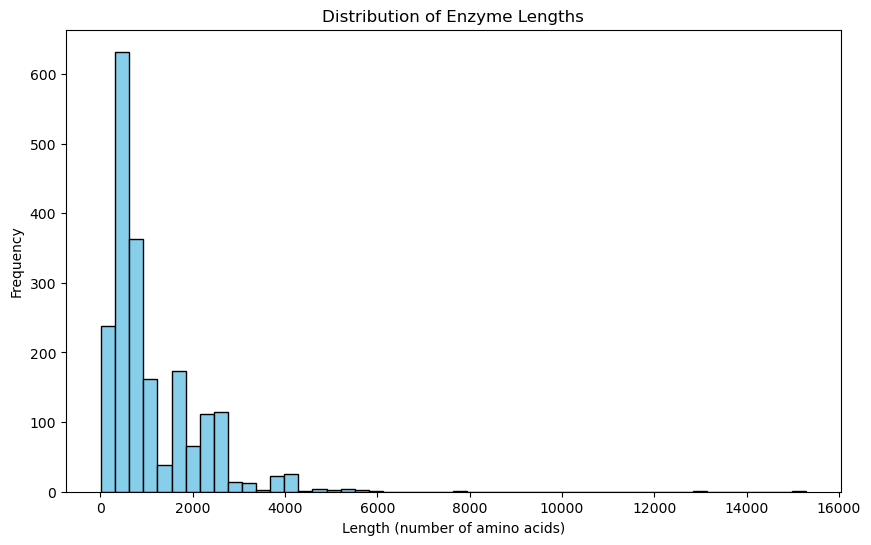

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Enzyme Lengths')
plt.xlabel('Length (number of amino acids)')
plt.ylabel('Frequency')
plt.show()


In [7]:
# Define allowed standard amino acid characters
allowed_chars = set("ACDEFGHIKLMNPQRSTVWY")

# Function to check for unusual characters
def has_unusual_chars(seq):
    return not set(seq.upper()).issubset(allowed_chars)

# Create a new column indicating if a sequence contains unusual characters
df['Has_Unusual'] = df['Sequence'].apply(has_unusual_chars)

# Count the number of sequences with unusual characters
num_unusual = df['Has_Unusual'].sum()
print("Number of sequences with unusual characters:", num_unusual)


Number of sequences with unusual characters: 10


In [8]:
print(df[df['Has_Unusual']].head(10)[['Entry', 'Sequence']])

       Entry                                           Sequence
295   P14422  HLLDFRKMIRYTTGKEATTSYGAYGCHCGVGGRGAPKXAKFLSYKF...
1275  P56729  MARKKFSGLEIXLIVLFAIVLSIAIALVVVXASKXPAVIKLPSDPI...
1390  Q2HBN0  MSAADQEPIAVIGMACRFPGGSNSPSKLWELLKAPHDIAKPIPDDR...
1434  Q58DK4  MTSKKLVNSVAGCADDALAGLVACNPSLQLLQGHRVALRSDLDSLK...
1712  D7UQ44  MTSQYGTNGASADPEPIAIVGMGCRWPGGVRDASSLWELLKNKRSG...
1860  Q2PQH8  MGHSKQIRILLLNEMEKLEKTLFRLEQGFELQFRLGPTLQGKAVTV...
1975  P28624  MASPVQALLLDMDGVMAEVSQSYRQAIIDTARHFGVSVTHEDIDHT...
1976  P37715                          SGPVPSGCLRCICVVESGXRMPNPV
1980  P81710                  KVFERXELARTLKRLGLDGFRGVSLPNXVXLAR
1982  P82175                                 KYFATRCDLVRELRKXGF


The appearance of "X" isn't a mistake per se—it indicates uncertainty in the sequence. This can happen in automated annotations or due to limitations in experimental data.

In [9]:
df_clean = df[~df['Has_Unusual']].copy()
print("Entries after removing sequences with unusual characters:", len(df_clean))

Entries after removing sequences with unusual characters: 1982


## Visualizing the Length Distribution

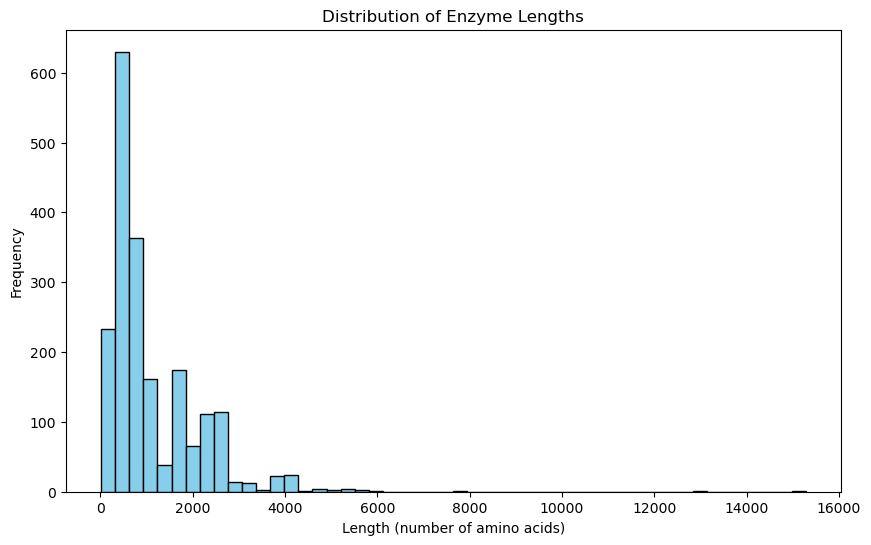

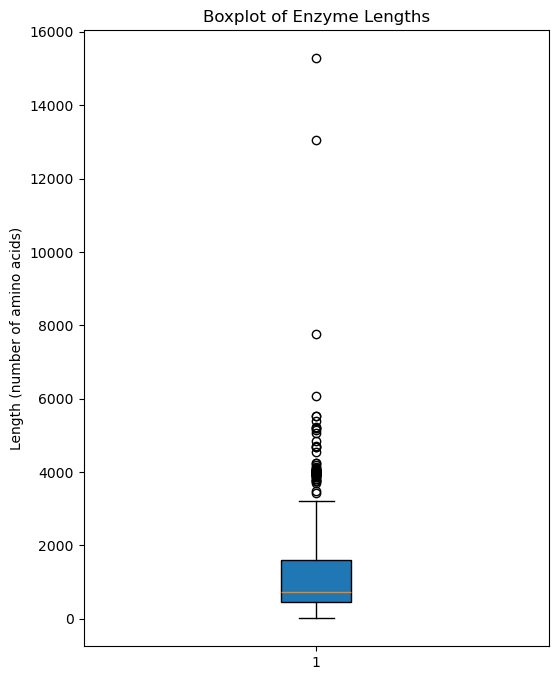

In [10]:
import matplotlib.pyplot as plt

# If you filtered out the sequences with unusual characters, use df_clean; 
# otherwise, you can use the original DataFrame (df).
# For this example, I'll assume you have a clean dataset called df_clean.
# If not, you can simply use df.

# Histogram of enzyme lengths
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Enzyme Lengths')
plt.xlabel('Length (number of amino acids)')
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize outliers and distribution spread
plt.figure(figsize=(6, 8))
plt.boxplot(df_clean['Length'], vert=True, patch_artist=True)
plt.title('Boxplot of Enzyme Lengths')
plt.ylabel('Length (number of amino acids)')
plt.show()


Summary statistics for enzyme lengths:
count     1982.000000
mean      1108.333502
std       1038.174740
min         14.000000
25%        460.250000
50%        741.500000
75%       1604.750000
max      15281.000000
Name: Length, dtype: float64


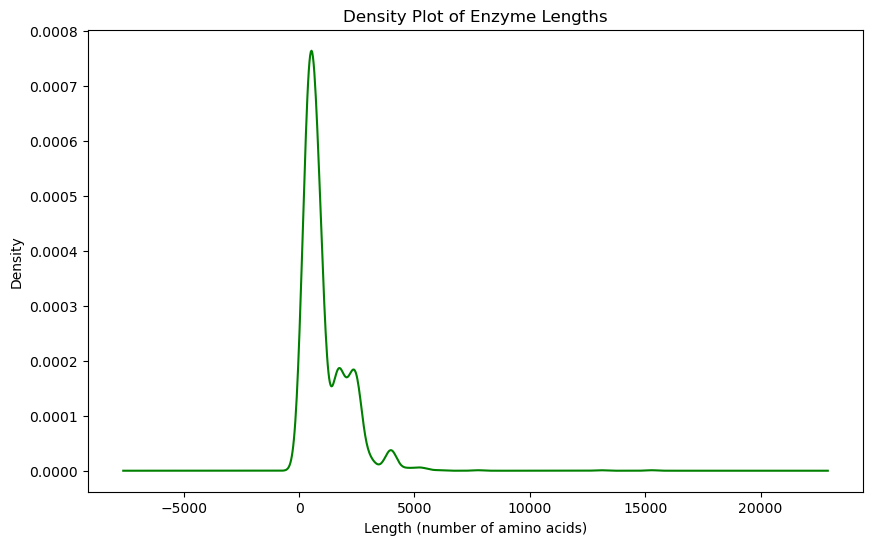

In [11]:
# Summary statistics
print("Summary statistics for enzyme lengths:")
print(df_clean['Length'].describe())

# Density plot (Kernel Density Estimate)
plt.figure(figsize=(10, 6))
df_clean['Length'].plot(kind='kde', color='green')
plt.title('Density Plot of Enzyme Lengths')
plt.xlabel('Length (number of amino acids)')
plt.show()


These observations imply that while many enzymes cluster around a few hundred amino acids, there is a long tail of very large enzymes. This variability is what I’ll explore further to see if there are any underlying periodic patterns or “preferred” sizes.

### Fourier Transform Analysis

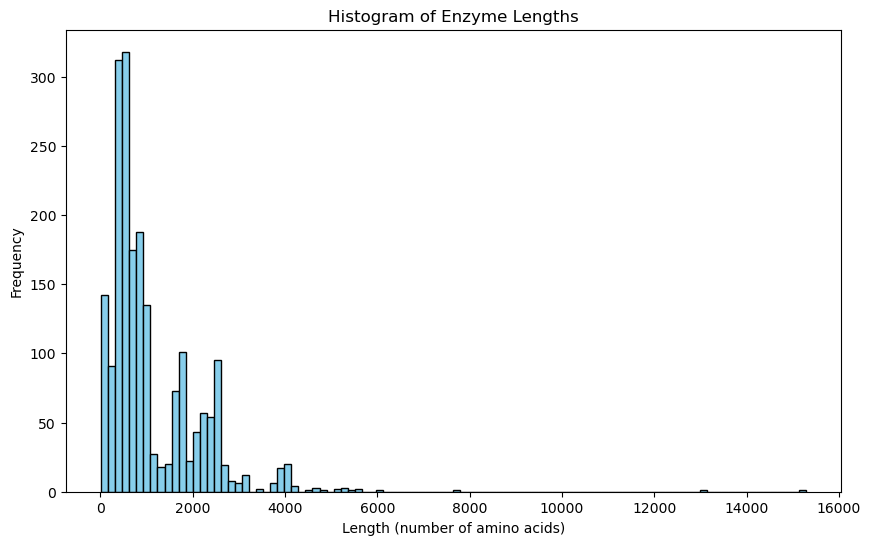

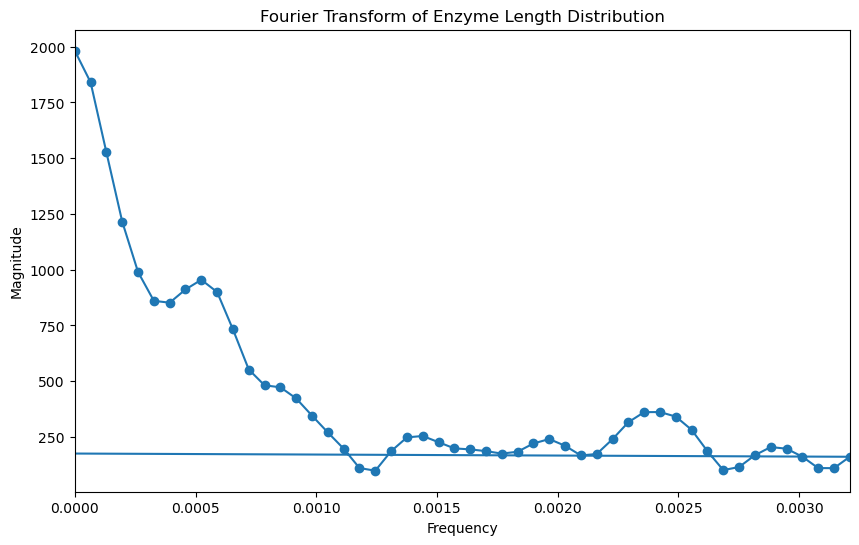

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your cleaned DataFrame as df_clean
# Extract the enzyme length data
lengths = df_clean['Length'].values

# Create a histogram: counts will serve as your discrete signal
counts, bin_edges = np.histogram(lengths, bins=100)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=bin_edges[1]-bin_edges[0], color='skyblue', edgecolor='black')
plt.title('Histogram of Enzyme Lengths')
plt.xlabel('Length (number of amino acids)')
plt.ylabel('Frequency')
plt.show()

# Apply the Fourier Transform to the histogram counts
fft_result = np.fft.fft(counts)
frequencies = np.fft.fftfreq(len(counts), d=(bin_edges[1]-bin_edges[0]))

# Plot the magnitude of the Fourier transform
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(fft_result), marker='o', linestyle='-')
plt.title('Fourier Transform of Enzyme Length Distribution')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.xlim(0, frequencies.max())  # Focus on the positive frequencies
plt.show()


From this plot alone, it can be seen that there are no strong periodic pattern in the enzyme length distribution. The large spike at zero frequency is expected, and the rest of the spectrum does not reveal any pronounced peaks that would indicate a clear, regular interval for enzyme lengths. However, let us verify the analysis. 

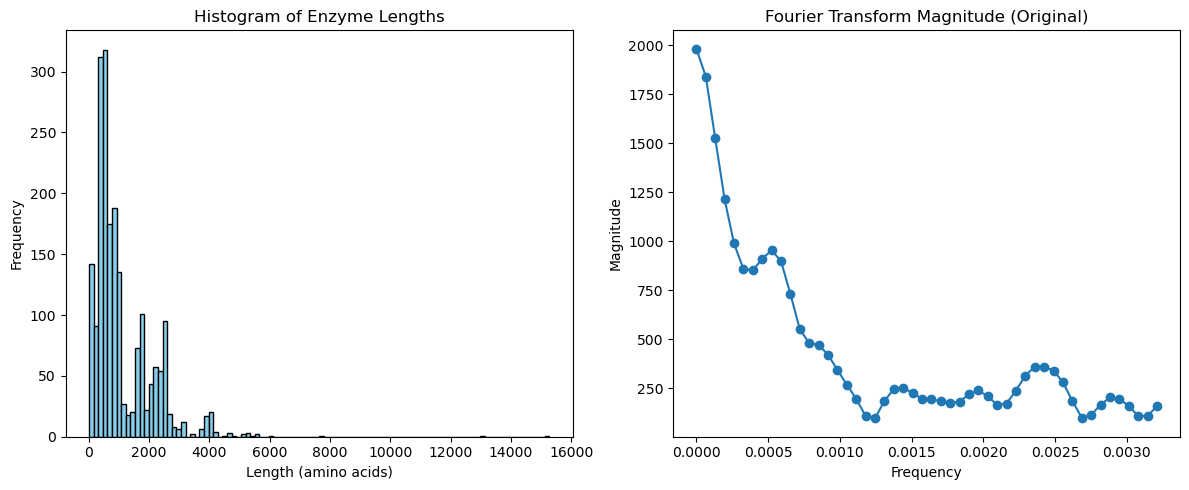

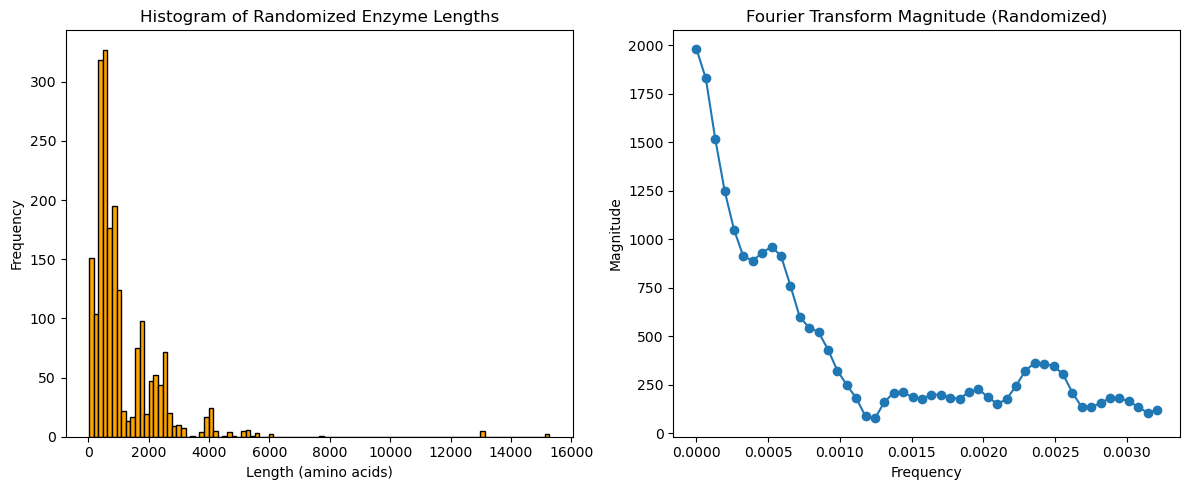

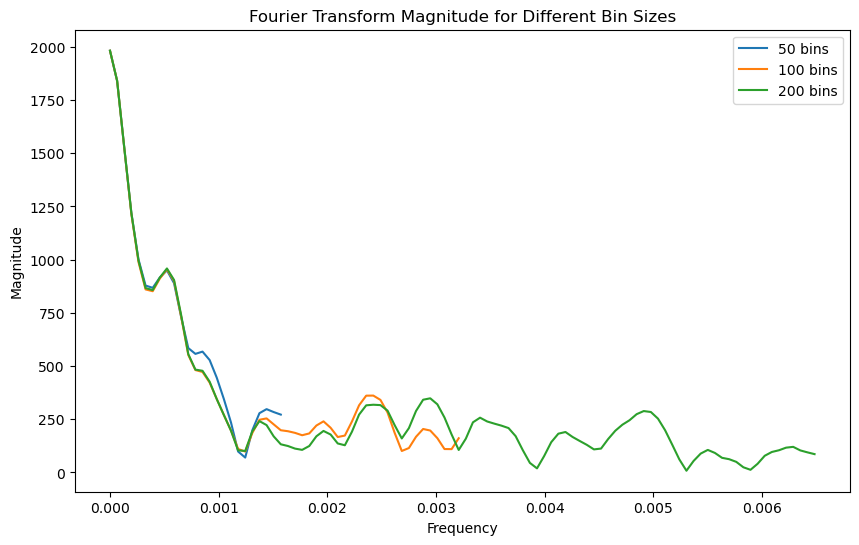

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assume df_clean is your cleaned DataFrame containing the enzyme lengths.
# Replace 'Length' with the actual column name if different.
lengths = df_clean['Length'].values

# Define a function to compute histogram and FFT of the counts
def compute_fft_histogram(lengths, bins=100):
    counts, bin_edges = np.histogram(lengths, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    fft_result = np.fft.fft(counts)
    # Calculate the frequency resolution from the bin width
    frequencies = np.fft.fftfreq(len(counts), d=(bin_edges[1]-bin_edges[0]))
    return counts, bin_centers, fft_result, frequencies, bin_edges

# 1. Compute and plot FFT for the original dataset with 100 bins
bins = 100
counts, bin_centers, fft_result, frequencies, bin_edges = compute_fft_histogram(lengths, bins=bins)

plt.figure(figsize=(12, 5))

# Plot the histogram
plt.subplot(1,2,1)
plt.bar(bin_centers, counts, width=bin_edges[1]-bin_edges[0], color='skyblue', edgecolor='black')
plt.title('Histogram of Enzyme Lengths')
plt.xlabel('Length (amino acids)')
plt.ylabel('Frequency')

# Plot the Fourier transform magnitude (only positive frequencies)
plt.subplot(1,2,2)
# Only consider the positive half of the frequency spectrum
half = len(frequencies)//2
plt.plot(frequencies[:half], np.abs(fft_result)[:half], marker='o', linestyle='-')
plt.title('Fourier Transform Magnitude (Original)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

# 2. Compare with a randomized dataset
# Create a randomized version by bootstrapping (sampling with replacement)
np.random.seed(42)  # For reproducibility
random_lengths = np.random.choice(lengths, size=len(lengths), replace=True)
counts_rand, bin_centers_rand, fft_result_rand, frequencies_rand, _ = compute_fft_histogram(random_lengths, bins=bins)

plt.figure(figsize=(12, 5))

# Plot the randomized histogram
plt.subplot(1,2,1)
plt.bar(bin_centers_rand, counts_rand, width=bin_edges[1]-bin_edges[0], color='orange', edgecolor='black')
plt.title('Histogram of Randomized Enzyme Lengths')
plt.xlabel('Length (amino acids)')
plt.ylabel('Frequency')

# Plot the Fourier transform magnitude for the randomized data
plt.subplot(1,2,2)
plt.plot(frequencies_rand[:half], np.abs(fft_result_rand)[:half], marker='o', linestyle='-')
plt.title('Fourier Transform Magnitude (Randomized)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

# 3. Test different histogram bin sizes to check robustness
bin_sizes = [50, 100, 200]
plt.figure(figsize=(10, 6))
for b in bin_sizes:
    _, _, fft_res, freqs, _ = compute_fft_histogram(lengths, bins=b)
    half = len(freqs)//2
    plt.plot(freqs[:half], np.abs(fft_res)[:half], label=f'{b} bins')
plt.title('Fourier Transform Magnitude for Different Bin Sizes')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()
plt.show()


The lines for 50, 100, and 200 bins all follow a similar shape, with the largest magnitude at frequency ≈ 0 and then tapering off without any tall spikes.

If there were a strong periodic signal in enzyme lengths, you would expect a prominent peak at some non-zero frequency, regardless of the binning strategy. The absence of such a peak across multiple bin settings strongly suggests that no single periodic length interval dominates.

In conclusion, the eukaryotic enzyme lengths in the dataset do not exhibit a single or strong repeating pattern. In simpler terms, there is no evident “preferred size” that appears periodically across this large set of enzymes- at least not in a way that would create a strong frequency peak in the Fourier transform.

## Analysis on subsetted data for more clarity and simplicity

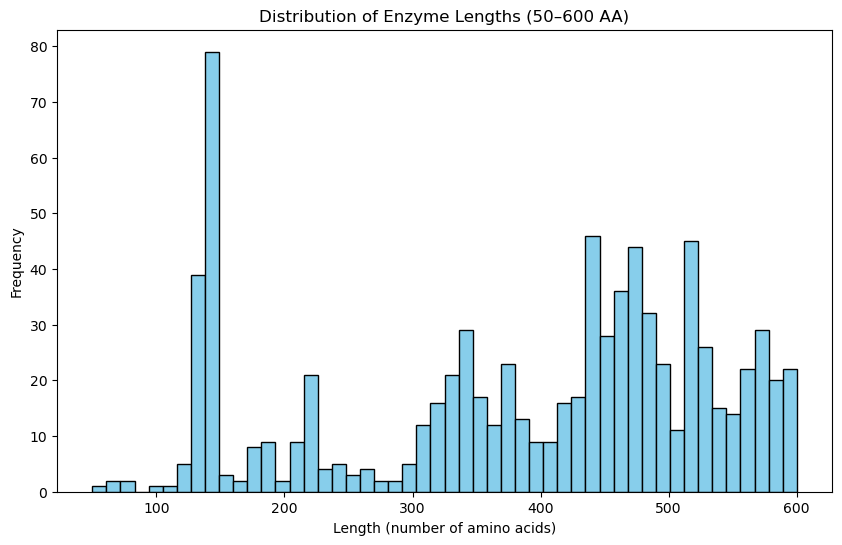

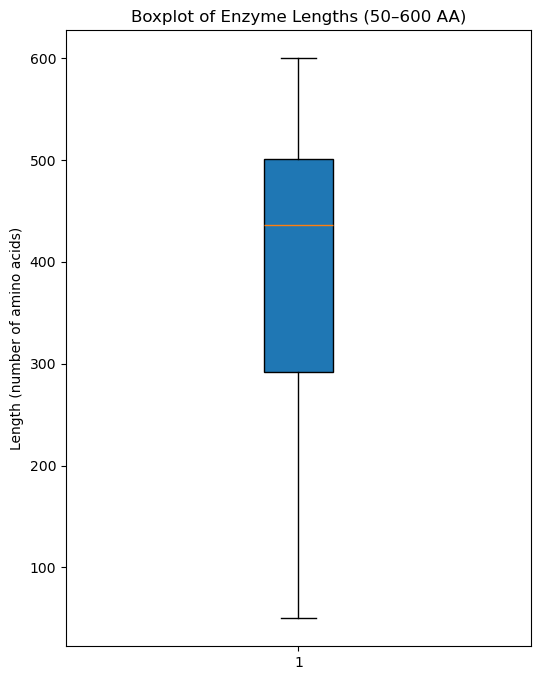

In [15]:
import matplotlib.pyplot as plt

# 1. Subset your DataFrame to lengths in [50, 600]
df_subset = df_clean[(df_clean['Length'] >= 50) & (df_clean['Length'] <= 600)]

# 2. Plot a histogram of the subsetted enzyme lengths
plt.figure(figsize=(10, 6))
plt.hist(df_subset['Length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Enzyme Lengths (50–600 AA)')
plt.xlabel('Length (number of amino acids)')
plt.ylabel('Frequency')
plt.show()

# 3. Plot a boxplot to visualize outliers and distribution spread in the subset
plt.figure(figsize=(6, 8))
plt.boxplot(df_subset['Length'], vert=True, patch_artist=True)
plt.title('Boxplot of Enzyme Lengths (50–600 AA)')
plt.ylabel('Length (number of amino acids)')
plt.show()


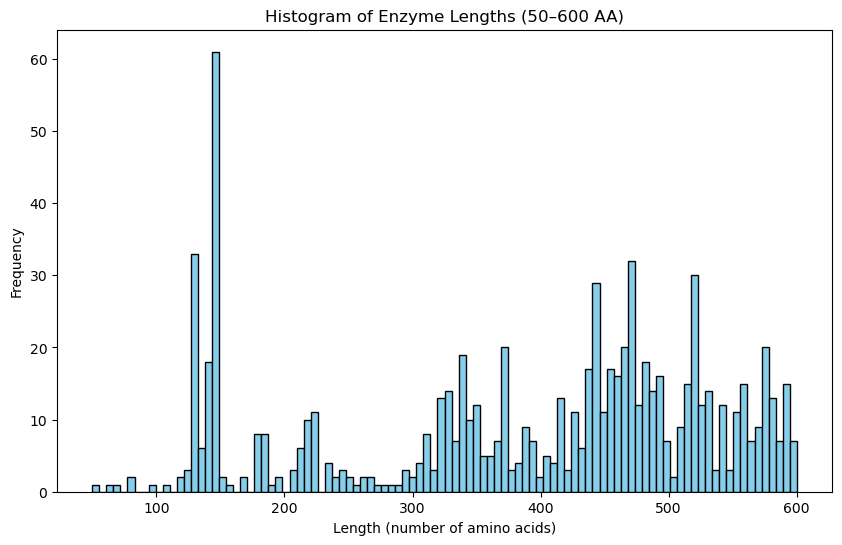

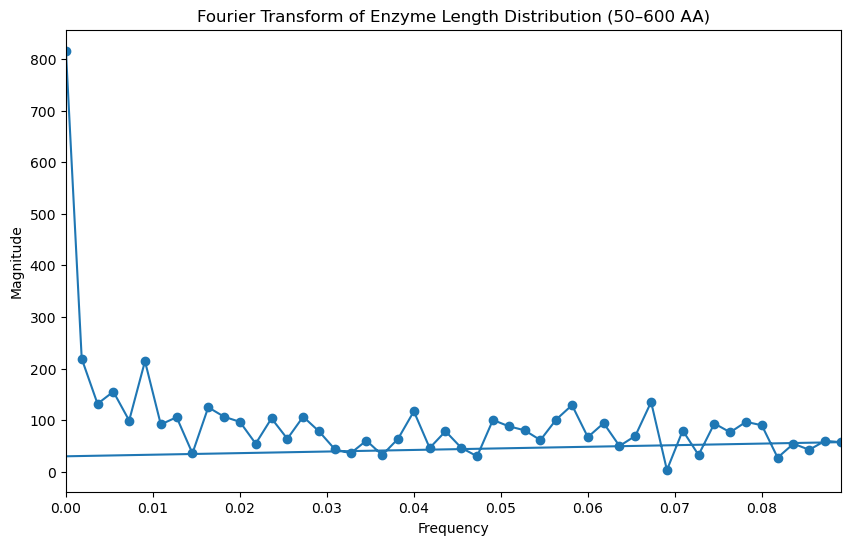

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Extract the subsetted lengths
lengths_subset = df_subset['Length'].values

# 2. Create a histogram: 'counts' will serve as the discrete signal for the FFT
counts, bin_edges = np.histogram(lengths_subset, bins=100)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# 3. Plot the histogram to visualize the distribution in the subset
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], 
        color='skyblue', edgecolor='black')
plt.title('Histogram of Enzyme Lengths (50–600 AA)')
plt.xlabel('Length (number of amino acids)')
plt.ylabel('Frequency')
plt.show()

# 4. Apply the Fourier Transform to the histogram counts
fft_result = np.fft.fft(counts)
frequencies = np.fft.fftfreq(len(counts), d=(bin_edges[1] - bin_edges[0]))

# 5. Plot the magnitude of the Fourier transform (focus on positive frequencies)
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(fft_result), marker='o', linestyle='-')
plt.title('Fourier Transform of Enzyme Length Distribution (50–600 AA)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.xlim(0, frequencies.max())  # Limit the x-axis to positive frequencies
plt.show()


### Spectral Analysis of Distribution and Mixture Model Analysis for validation 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Entry          1992 non-null   object
 1   Entry Name     1992 non-null   object
 2   Protein names  1992 non-null   object
 3   Gene Names     1872 non-null   object
 4   Organism       1992 non-null   object
 5   Length         1992 non-null   int64 
 6   Sequence       1992 non-null   object
 7   EC number      1975 non-null   object
dtypes: int64(1), object(7)
memory usage: 124.6+ KB
None
        Entry   Entry Name                                      Protein names  \
0  A0A075TRC0   PATK_PENEN  6-methylsalicylic acid synthase (6MSAS) (EC 2....   
1  A0A098D6U0   ZEA1_GIBZE  Non-reducing polyketide synthase ZEA1 (EC 2.3....   
2  A0A0D1DWQ2   CMU1_MYCMD           Secreted chorismate mutase (EC 5.4.99.5)   
3  A0A0R4I9Y1  R213B_DANRE  E3 ubiquitin-protein ligase rnf213-beta (EC 2....   
4 

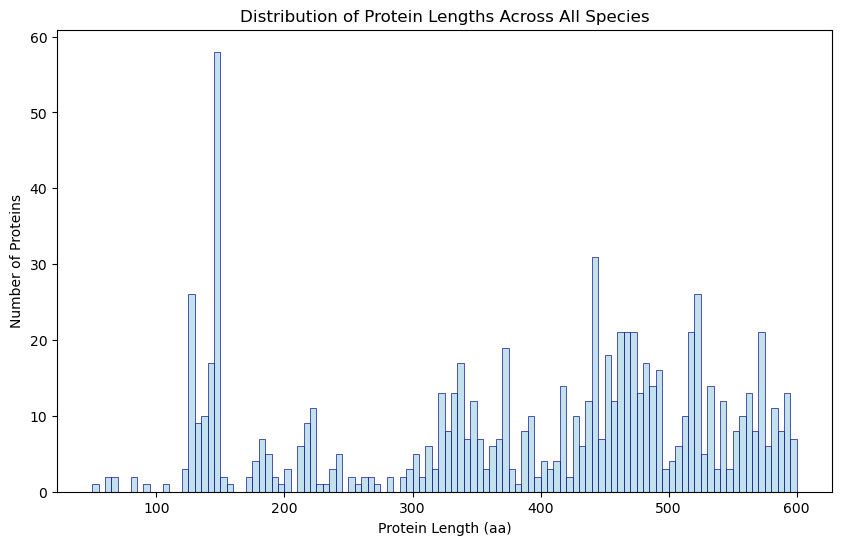

Preferred period: 170


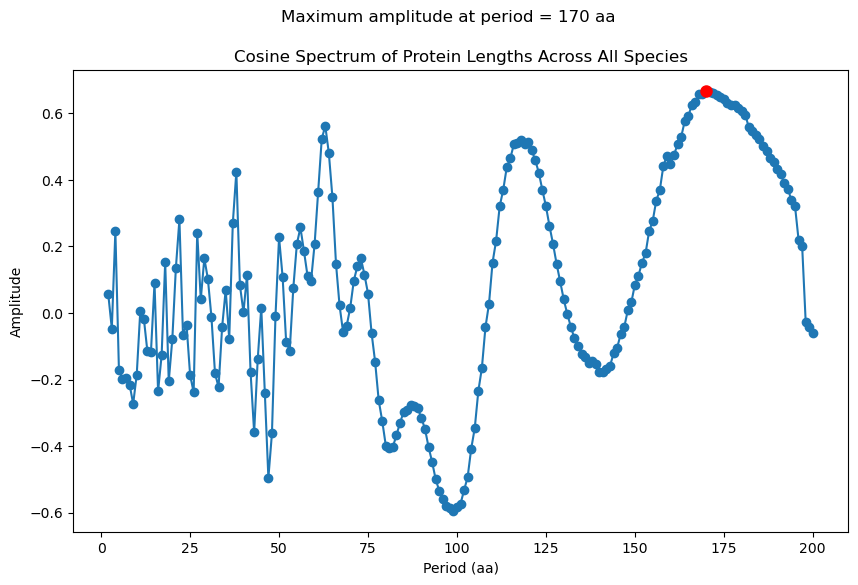

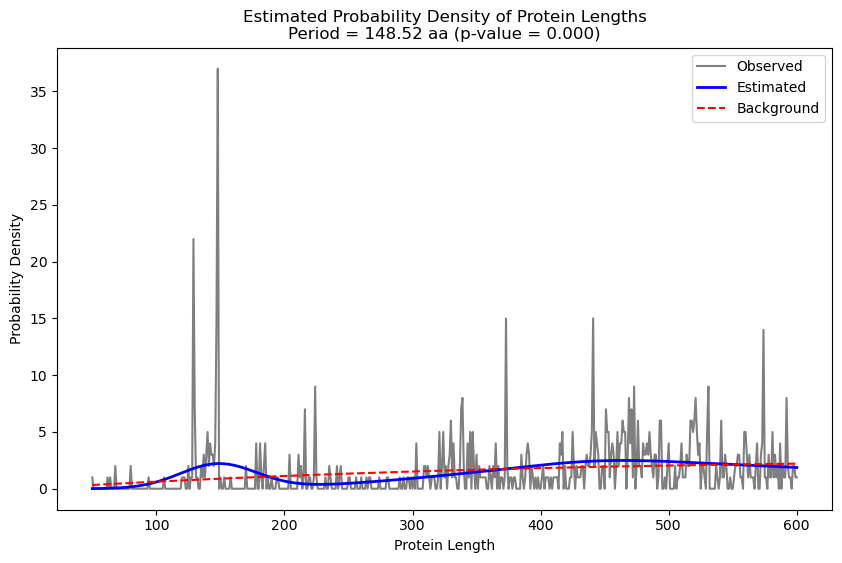

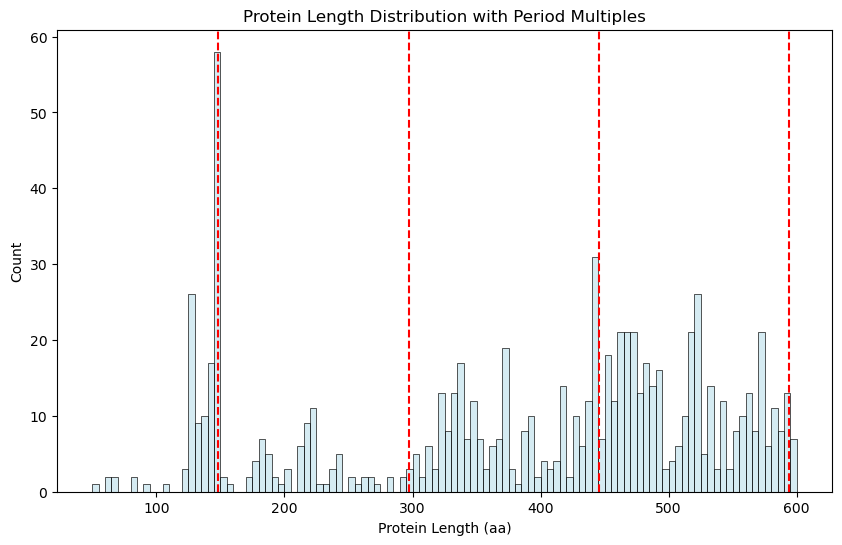

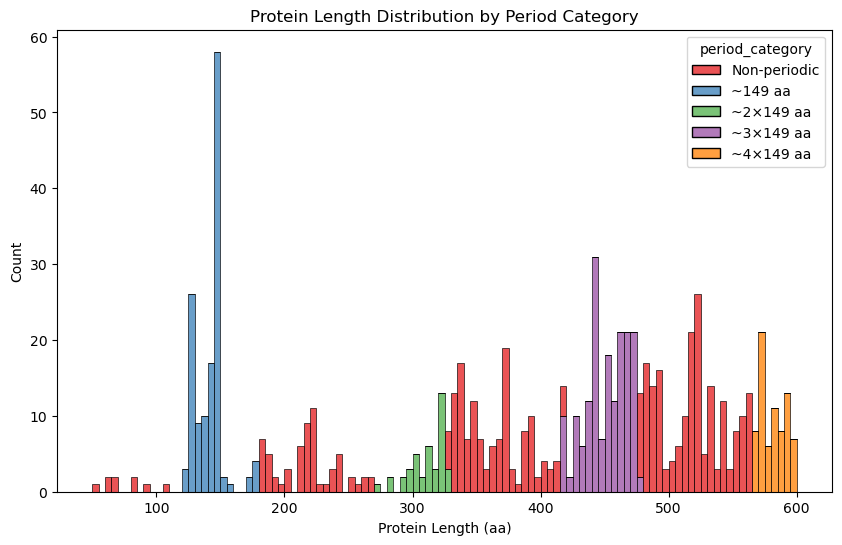


=== PERIODIC PROTEIN ANALYSIS SUMMARY ===
Total proteins analyzed: 820
Proteins near period multiples: 419 (51.1%)
Fundamental period: 148.5 aa (± 30.0 )
  Multiple 1: 132 (16.1%)
  Multiple 2: 40 (4.9%)
  Multiple 3: 173 (21.1%)
  Multiple 4: 74 (9.0%)
               Analysis  Total Proteins  Fundamental Period (aa)    Std Dev  \
0  All Species Combined             820               148.524751  30.000871   

   Periodic Proteins  Periodic %  
0                419   51.097561  


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import convolve
from scipy.optimize import minimize
from scipy.special import gamma
from scipy.stats import chi2
import warnings

warnings.filterwarnings("ignore")

###############################################
# Step 1: Data Import and Preparation
###############################################
# Replace with your actual file path
file_path = "/Users/akash/Documents/NYU/Spring/AI_GenAI/EukaryoticEnzymeAnalysis/uniprotkb_taxonomy_id_2759_AND_keyword_2025_03_04.xlsx"

# Read the Excel file
all_uniprot = pd.read_excel(file_path)
print(all_uniprot.info())
print(all_uniprot.head())

# Check your column names
print("Columns:", all_uniprot.columns.tolist())

# Sort data by protein length (using 'Length' column)
all_uniprot_clean = all_uniprot.copy().sort_values(by="Length")
print("Total proteins in dataset:", len(all_uniprot_clean))

###############################################
# Step 2: Data Cleaning and Filtering
###############################################
# Filter proteins by length range for analysis: 50 - 600 amino acids
min_length = 50
max_length = 600
filtered_proteins = all_uniprot_clean[(all_uniprot_clean['Length'] >= min_length) & 
                                      (all_uniprot_clean['Length'] <= max_length)]
print("Filtered proteins for analysis:", len(filtered_proteins))

###############################################
# Step 3: Exploratory Data Visualization
###############################################
# Overall protein length distribution using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(filtered_proteins['Length'], binwidth=5, color="lightblue", edgecolor="darkblue")
plt.title("Distribution of Protein Lengths Across All Species")
plt.xlabel("Protein Length (aa)")
plt.ylabel("Number of Proteins")
plt.show()

###############################################
# Step 4: Prepare Data for Spectral Analysis of Distributions (SAD)
###############################################
def prepare_for_sad(data):
    # Create frequency table of protein lengths using the 'Length' column
    length_counts = data['Length'].value_counts().reset_index()
    length_counts.columns = ['Length', 'n']
    length_counts = length_counts.sort_values('Length')
    # Define complete range of lengths
    min_len = int(length_counts['Length'].min())
    max_len = int(length_counts['Length'].max())
    all_lengths = pd.DataFrame({'Length': np.arange(min_len, max_len+1)})
    # Join with counts and fill missing values with zero
    complete_counts = pd.merge(all_lengths, length_counts, on='Length', how='left')
    complete_counts['n'] = complete_counts['n'].fillna(0)
    return complete_counts

sad_prepared_data = prepare_for_sad(filtered_proteins)

###############################################
# Step 5: Implement Spectral Analysis of Distributions (SAD)
###############################################
def sad_analysis(total_vector, min_period=2, max_period=200):
    periods = np.arange(min_period, max_period+1)
    amplitudes = []
    for j in periods:
        # Calculate non-oscillating background using a moving average filter (window size = j)
        window = np.ones(j) / j
        nonosc = np.convolve(total_vector, window, mode='same')
        half_j = j // 2
        valid_indices = np.arange(half_j, len(total_vector) - half_j)
        osc = total_vector[valid_indices] - nonosc[valid_indices]
        t = np.arange(len(osc))
        cos_component = np.cos(2 * np.pi * t / j)
        amplitude = np.sum(osc * cos_component) / np.sum(cos_component**2)
        amplitudes.append(amplitude)
    return pd.DataFrame({'period': periods, 'amplitude': amplitudes})

min_period = 2
max_period = 200
sad_results = sad_analysis(sad_prepared_data['n'].values, min_period, max_period)
max_peak = sad_results[sad_results['amplitude'] == sad_results['amplitude'].max()]
preferred_period = max_peak['period'].iloc[0]
print("Preferred period:", preferred_period)

# Visualize SAD results
plt.figure(figsize=(10,6))
plt.plot(sad_results['period'], sad_results['amplitude'], '-o')
plt.plot(max_peak['period'], max_peak['amplitude'], 'ro', markersize=8)
plt.title("Cosine Spectrum of Protein Lengths Across All Species")
plt.xlabel("Period (aa)")
plt.ylabel("Amplitude")
plt.suptitle(f"Maximum amplitude at period = {preferred_period} aa")
plt.show()

###############################################
# Step 7: Statistical Modeling with Mixture Model
###############################################
# Define normalized gamma and normal PDFs
def gamma_pdf(x, alpha, beta):
    raw_pdf = (x**alpha) * np.exp(-x / beta) / (gamma(alpha + 1) * beta**(alpha + 1))
    return raw_pdf / np.sum(raw_pdf)

def normal_pdf(x, mu, sigma):
    raw_pdf = np.exp(-((x - mu)**2) / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    return raw_pdf / np.sum(raw_pdf)

###############################################
# Step 8: Implement Mixture Model Analysis
###############################################
def mixture_model_analysis(length_counts_for_model, preferred_period, k=4):
    # Create vector for lengths and counts from the frequency table
    imin = int(length_counts_for_model['Length'].min())
    imax = int(length_counts_for_model['Length'].max())
    lengths_vec = np.arange(imin, imax+1)
    
    # For each length in the complete range, assign the count if it exists, else 0.
    counts = []
    for l in lengths_vec:
        matching = length_counts_for_model[length_counts_for_model['Length'] == l]['n'].values
        if len(matching) > 0:
            counts.append(matching[0])
        else:
            counts.append(0)
    counts = np.array(counts)
    n_total = np.sum(counts)
    
    # Negative log-likelihood for full model
    def full_model_nll(params):
        mu, sigma, alpha, beta, p1, p2, p3, p4 = params
        if sigma <= 0 or beta <= 0 or alpha < 0 or any(p < 0 for p in [p1, p2, p3, p4]) or (p1+p2+p3+p4) >= 1:
            return 1e10
        g_pdf = gamma_pdf(lengths_vec, alpha, beta)
        f1_pdf = normal_pdf(lengths_vec, mu, sigma)
        f2_pdf = normal_pdf(lengths_vec, 2*mu, np.sqrt(2)*sigma)
        f3_pdf = normal_pdf(lengths_vec, 3*mu, np.sqrt(3)*sigma)
        f4_pdf = normal_pdf(lengths_vec, 4*mu, np.sqrt(4)*sigma)
        mixture_pdf = (1 - p1 - p2 - p3 - p4) * g_pdf + p1 * f1_pdf + p2 * f2_pdf + p3 * f3_pdf + p4 * f4_pdf
        return -np.sum(counts * np.log(mixture_pdf + 1e-10))
    
    # Negative log-likelihood for background-only (null) model
    def background_only_nll(params):
        alpha, beta = params
        if beta <= 0 or alpha < 0:
            return 1e10
        g_pdf = gamma_pdf(lengths_vec, alpha, beta)
        return -np.sum(counts * np.log(g_pdf + 1e-10))
    
    # Initial parameter guesses based on data moments
    initial_mu = preferred_period
    initial_sigma = preferred_period / 10
    mean_val = np.sum(lengths_vec * counts) / n_total
    var_val = np.sum(counts * (lengths_vec - mean_val)**2) / n_total
    initial_beta = var_val / mean_val
    initial_alpha = (mean_val / initial_beta) - 1
    initial_p1 = 0.01
    initial_p2 = 0.03
    initial_p3 = 0.07
    initial_p4 = 0.12
    
    x0 = [initial_mu, initial_sigma, initial_alpha, initial_beta, initial_p1, initial_p2, initial_p3, initial_p4]
    bounds_full = [(50,200), (1,50), (0,10), (1,1000), (0,0.2), (0,0.2), (0,0.2), (0,0.2)]
    res_full = minimize(full_model_nll, x0, method='L-BFGS-B', bounds=bounds_full)
    if not res_full.success:
        print("Full model optimization failed:", res_full.message)
        return None
    
    x0_null = [initial_alpha, initial_beta]
    bounds_null = [(0,10), (1,1000)]
    res_null = minimize(background_only_nll, x0_null, method='L-BFGS-B', bounds=bounds_null)
    if not res_null.success:
        print("Null model optimization failed:", res_null.message)
        return None
    
    params = res_full.x
    mu_hat, sigma_hat, alpha_hat, beta_hat, p1_hat, p2_hat, p3_hat, p4_hat = params
    background_params = res_null.x
    alpha0_hat, beta0_hat = background_params
    
    mu_background = beta_hat * (alpha_hat + 1)
    sigma_background = beta_hat * np.sqrt(alpha_hat + 1)
    mu_pure_background = beta0_hat * (alpha0_hat + 1)
    sigma_pure_background = beta0_hat * np.sqrt(alpha0_hat + 1)
    
    L0 = background_only_nll(background_params)
    L1 = full_model_nll(params)
    lambda_stat = 2 * (L0 - L1)
    df = k + 2
    p_value = chi2.sf(lambda_stat, df)
    
    # Generate model fits for visualization
    gamma_background = gamma_pdf(lengths_vec, alpha_hat, beta_hat)
    pure_gamma_background = gamma_pdf(lengths_vec, alpha0_hat, beta0_hat)
    full_model_pdf = (1 - p1_hat - p2_hat - p3_hat - p4_hat) * gamma_background
    if p1_hat > 0:
        full_model_pdf += p1_hat * normal_pdf(lengths_vec, mu_hat, sigma_hat)
    if p2_hat > 0:
        full_model_pdf += p2_hat * normal_pdf(lengths_vec, 2*mu_hat, np.sqrt(2)*sigma_hat)
    if p3_hat > 0:
        full_model_pdf += p3_hat * normal_pdf(lengths_vec, 3*mu_hat, np.sqrt(3)*sigma_hat)
    if p4_hat > 0:
        full_model_pdf += p4_hat * normal_pdf(lengths_vec, 4*mu_hat, np.sqrt(4)*sigma_hat)
    
    estimated_counts = full_model_pdf * n_total
    background_only_counts = pure_gamma_background * n_total
    
    model_data = pd.DataFrame({
        'Length': lengths_vec,
        'observed': counts,
        'estimated': estimated_counts,
        'background': background_only_counts
    })
    
    plt.figure(figsize=(10,6))
    plt.plot(model_data['Length'], model_data['observed'], color='black', alpha=0.5, label='Observed')
    plt.plot(model_data['Length'], model_data['estimated'], color='blue', linewidth=2, label='Estimated')
    plt.plot(model_data['Length'], model_data['background'], color='red', linestyle='dashed', label='Background')
    plt.title(f"Estimated Probability Density of Protein Lengths\nPeriod = {mu_hat:.2f} aa (p-value = {p_value:.3f})")
    plt.xlabel("Protein Length")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.show()
    
    return {
        'mu': mu_hat,
        'sigma': sigma_hat,
        'mu_background': mu_background,
        'sigma_background': sigma_background,
        'p1': p1_hat,
        'p2': p2_hat,
        'p3': p3_hat,
        'p4': p4_hat,
        'p_value': p_value,
        'model_data': model_data
    }

# Group by 'Length' to create the frequency table and run the mixture model analysis
length_counts_for_model = filtered_proteins.groupby('Length').size().reset_index(name='n')
model_results = mixture_model_analysis(length_counts_for_model, preferred_period)

###############################################
# Step 9: Analyze Protein Periodicity
###############################################
def analyze_protein_periodicity(protein_df, period, sigma, k_max=4):
    # Function to check if a protein length is near a multiple of the period
    def is_near_period_multiple(x, period, sigma, k_max):
        for k in range(1, k_max+1):
            if abs(x - k * period) <= sigma:
                return k
        return 0
    protein_df = protein_df.copy()
    protein_df['period_multiple'] = protein_df['Length'].apply(lambda x: is_near_period_multiple(x, period, sigma, k_max))
    protein_df['is_period_related'] = protein_df['period_multiple'] > 0
    def cat_label(k):
        if k == 0:
            return "Non-periodic"
        elif k == 1:
            return f"~{round(period)} aa"
        else:
            return f"~{k}×{round(period)} aa"
    protein_df['period_category'] = protein_df['period_multiple'].apply(cat_label)
    
    period_summary = protein_df.groupby(['period_multiple', 'period_category']).size().reset_index(name='count').sort_values('period_multiple')
    
    plt.figure(figsize=(10,6))
    sns.histplot(protein_df['Length'], binwidth=5, color="lightblue", edgecolor="black", alpha=0.5)
    for k in range(1,5):
        plt.axvline(k*period, linestyle='dashed', color='red')
    plt.title("Protein Length Distribution with Period Multiples")
    plt.xlabel("Protein Length (aa)")
    plt.ylabel("Count")
    plt.show()
    
    plt.figure(figsize=(10,6))
    sns.histplot(data=protein_df, x="Length", hue="period_category", binwidth=5, multiple="stack", palette="Set1")
    plt.title("Protein Length Distribution by Period Category")
    plt.xlabel("Protein Length (aa)")
    plt.ylabel("Count")
    plt.show()
    
    total = len(protein_df)
    periodic_count = protein_df['is_period_related'].sum()
    print("\n=== PERIODIC PROTEIN ANALYSIS SUMMARY ===")
    print("Total proteins analyzed:", total)
    print(f"Proteins near period multiples: {periodic_count} ({periodic_count/total*100:.1f}%)")
    print("Fundamental period:", round(period, 1), "aa (±", round(sigma, 1), ")")
    for i in range(1,5):
        count = (protein_df['period_multiple'] == i).sum()
        percent = count/total*100
        print(f"  Multiple {i}: {count} ({percent:.1f}%)")
    
    return {'enhanced_proteins': protein_df, 'period_summary': period_summary}

# Use the period and sigma from the mixture model if available, else fallback
if model_results is not None:
    period_val = model_results['mu']
    sigma_val = model_results['sigma']
else:
    period_val = preferred_period
    sigma_val = preferred_period / 10

periodicity_results = analyze_protein_periodicity(filtered_proteins, period_val, sigma_val, k_max=4)

###############################################
# Step 10: Generate Final Summary Table
###############################################
def is_near_period_multiple_scalar(x, period, sigma, k_max=4):
    for k in range(1, k_max+1):
        if abs(x - k * period) <= sigma:
            return 1
    return 0

filtered_proteins['is_periodic'] = filtered_proteins['Length'].apply(lambda x: is_near_period_multiple_scalar(x, period_val, sigma_val, 4))
summary_table = pd.DataFrame({
    "Analysis": ["All Species Combined"],
    "Total Proteins": [len(filtered_proteins)],
    "Fundamental Period (aa)": [period_val],
    "Std Dev": [sigma_val],
    "Periodic Proteins": [filtered_proteins['is_periodic'].sum()],
    "Periodic %": [filtered_proteins['is_periodic'].mean() * 100]
})
print(summary_table)
